In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the traning file
data = pd.read_csv('./data/train_1.csv').fillna(0)
#page = data['Page']
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
split_page = data['Page'].str.rsplit("_", n = 3, expand = True)
data.insert(loc=0, column='name', value=split_page[0])
data.insert(loc=1, column='project', value=split_page[1])
data.insert(loc=2, column='access', value=split_page[2])
data.insert(loc=3, column='agent', value=split_page[3])
data.head()

,name,project,access,agent,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh.wikipedia.org,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh.wikipedia.org,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh.wikipedia.org,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh.wikipedia.org,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


No handles with labels found to put in legend.


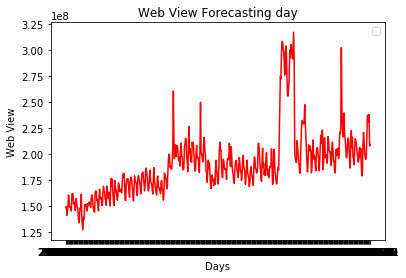

In [39]:
#gerando os dados somados para todos os dias
df = pd.DataFrame(data.loc[:,'2015-07-01':].sum(axis=0))
df.head()
plt.figure
plt.plot(df, color = 'red')
plt.title('Web View Forecasting day')
plt.xlabel('Days')
plt.ylabel('Web View')
plt.show()

In [12]:
# parse Page column
split_page = data['Page'].str.rsplit("_", n = 3, expand = True)
data.insert(loc=0, column='name', value=split_page[0])
data.insert(loc=1, column='project', value=split_page[1])
data.insert(loc=2, column='access', value=split_page[2])
data.insert(loc=3, column='agent', value=split_page[3])
data.insert(loc=4, column='total', value=data.loc[:,'2015-07-01':].sum(axis=1))
data = data.drop(['Page'], axis=1)

split_language = data['project'].str.split(".", n = 1, expand = True)
data.insert(loc=1, column='language', value=split_language[0])
data = data.drop(['project'], axis=1)
data = data.loc[:,:'total']

In [20]:
data_fil=data.sort_values(by=['total'], ascending=False)
#pd.write_csv(path_or_buf=data_fil)
data_fil.to_csv('data_fil_sorted.csv')
#print(data.loc[:,'2015-07-01':].sum(axis=1))
#print(data)
#print(data.loc[data['name'].isin(['jpg'])])
#x=data.loc[:,'name'].isin(['jpg'])
#print(data.loc[x,'name'])

In [48]:
import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
 
 
def process_text(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
    text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
 
    return tokens
 
 
def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering

documents = data.loc[:,'name']
clusters = cluster_texts(documents, 7)
pprint(dict(clusters))

TypeError: translate() takes exactly one argument (2 given)

In [47]:
import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

documents = data.loc[:,'name']
vectorizer = TfidfVectorizer(tokenizer=documents,
                            stop_words=stopwords.words('english'),
                            max_df=0.5,
                            min_df=0.1,
                            lowercase=True)
X = vectorizer.fit_transform(documents)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

TypeError: 'Series' object is not callable